# Using Scikit-Learn Linear Regression ML Model

In [30]:
# Import libraries necessary
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# Load the Data
data = pd.read_csv('data/data.csv')
target_fields = ['TGT0','TGT1','TGT2','TGT3']
features, targets = data.drop(target_fields, axis=1), data[target_fields]


The scikit-learn version is 0.18.1.


## Checking Out the Dataset

In [31]:
features.describe()

,Value00,Value01,Value02,Value03,Value04,Value05,Value06,Value07,Value08,Value09
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.053770,-0.047270,0.021190,-0.019120,-0.038300,-0.046830,-0.033790,-0.016430,0.058730,-0.009080
std,0.974953,0.990043,0.982625,1.016896,0.999852,1.008939,0.991402,1.005754,0.954923,0.946831
min,-2.760000,-2.840000,-3.020000,-2.810000,-3.740000,-3.070000,-2.840000,-3.120000,-3.390000,-2.990000
25%,-0.730000,-0.710000,-0.622500,-0.760000,-0.680000,-0.720000,-0.712500,-0.762500,-0.552500,-0.652500
50%,-0.060000,-0.080000,-0.005000,-0.020000,-0.030000,-0.030000,0.000000,-0.050000,0.050000,-0.010000
75%,0.600000,0.640000,0.690000,0.672500,0.630000,0.637500,0.620000,0.652500,0.670000,0.640000
max,2.930000,2.660000,2.870000,3.210000,3.310000,3.430000,3.170000,3.800000,2.980000,3.090000


In [32]:
targets.describe()

,TGT0,TGT1,TGT2,TGT3
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,87.47173,91.664730,94.518420,90.352870
std,169.21764,143.648337,168.817263,196.360771
min,-355.86000,-368.270000,-436.150000,-564.110000
25%,-27.26750,-9.247500,-16.052500,-33.852500
50%,86.16500,92.915000,86.595000,91.370000
75%,198.67000,189.027500,213.725000,222.695000
max,723.19000,585.310000,650.520000,705.460000


## Splitting the Dataset into Training and Testing Sets

In [33]:
target1 = targets['TGT0']

target1.describe()

count    1000.00000
mean       87.47173
std       169.21764
min      -355.86000
25%       -27.26750
50%        86.16500
75%       198.67000
max       723.19000
Name: TGT0, dtype: float64

## Building the Machine Learning Models

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

TGT0 = targets['TGT0']
features_train, features_test, targets_train, targets_test = train_test_split( \
    features, TGT0, test_size=0.20, random_state=42)

LinReg0 = LinearRegression()
LinReg0.fit(features_train, targets_train)

print("Linear Regression R-Squared Score on Training Data:", LinReg0.score(features_train,targets_train))
print("Linear Regression R-Squared Score on Testing Data:", LinReg0.score(features_test,targets_test))
print("Zero Intercept / Bias Value:", LinReg0.intercept_)
pd.DataFrame(list(zip(features.columns, LinReg0.coef_)), \
             columns = ['Feature Name', 'Linear Coefficient'])


Linear Regression R-Squared Score on Training Data: 0.999437860394
Linear Regression R-Squared Score on Testing Data: 0.999436370976
Zero Intercept / Bias Value: 100.137382183


,Feature Name,Linear Coefficient
0,Value00,20.967113
1,Value01,88.070912
2,Value02,13.168387
3,Value03,9.751452
4,Value04,8.237347
5,Value05,75.214819
6,Value06,77.775506
7,Value07,65.366775
8,Value08,13.204313
9,Value09,74.428469


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

TGT1 = targets['TGT1']
features_train, features_test, targets_train, targets_test = train_test_split( \
    features, TGT1, test_size=0.20, random_state=42)

LinReg1 = LinearRegression()
LinReg1.fit(features_train, targets_train)

print("Linear Regression R-Squared Score on Training Data:", LinReg1.score(features_train,targets_train))
print("Linear Regression R-Squared Score on Testing Data:", LinReg1.score(features_test,targets_test))
print("Zero Intercept / Bias Value:", LinReg1.intercept_)
pd.DataFrame(list(zip(features.columns, LinReg1.coef_)), \
             columns = ['Feature Name', 'Linear Coefficient'])

Linear Regression R-Squared Score on Training Data: 0.999155211304
Linear Regression R-Squared Score on Testing Data: 0.999371303037
Zero Intercept / Bias Value: 99.9829521893


,Feature Name,Linear Coefficient
0,Value00,41.574969
1,Value01,45.498027
2,Value02,43.930015
3,Value03,40.087647
4,Value04,33.596771
5,Value05,36.443975
6,Value06,50.185234
7,Value07,45.983062
8,Value08,35.140261
9,Value09,82.599513


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

TGT2 = targets['TGT2']
features_train, features_test, targets_train, targets_test = train_test_split( \
    features, TGT2, test_size=0.20, random_state=42)

LinReg2 = LinearRegression()
LinReg2.fit(features_train, targets_train)

print("Linear Regression R-Squared Score on Training Data:", LinReg2.score(features_train,targets_train))
print("Linear Regression R-Squared Score on Testing Data:", LinReg2.score(features_test,targets_test))
print("Zero Intercept / Bias Value:", LinReg2.intercept_)
pd.DataFrame(list(zip(features.columns, LinReg2.coef_)), \
             columns = ['Feature Name', 'Linear Coefficient'])

Linear Regression R-Squared Score on Training Data: 0.99942808137
Linear Regression R-Squared Score on Testing Data: 0.999412980118
Zero Intercept / Bias Value: 100.107037936


,Feature Name,Linear Coefficient
0,Value00,50.343121
1,Value01,61.943168
2,Value02,69.738638
3,Value03,52.274483
4,Value04,5.051112
5,Value05,5.540418
6,Value06,31.063415
7,Value07,98.193605
8,Value08,53.489810
9,Value09,49.257933


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

TGT3 = targets['TGT3']
features_train, features_test, targets_train, targets_test = train_test_split( \
    features, TGT3, test_size=0.20, random_state=42)

LinReg3 = LinearRegression()
LinReg3.fit(features_train, targets_train)

print("Linear Regression R-Squared Score on Training Data:", LinReg3.score(features_train,targets_train))
print("Linear Regression R-Squared Score on Testing Data:", LinReg3.score(features_test,targets_test))
print("Zero Intercept / Bias Value:", LinReg3.intercept_)
pd.DataFrame(list(zip(features.columns, LinReg3.coef_)), \
             columns = ['Feature Name', 'Linear Coefficient'])

Linear Regression R-Squared Score on Training Data: 0.999616736986
Linear Regression R-Squared Score on Testing Data: 0.999562341179
Zero Intercept / Bias Value: 99.6803819623


,Feature Name,Linear Coefficient
0,Value00,81.989868
1,Value01,69.452245
2,Value02,63.466723
3,Value03,73.189044
4,Value04,14.863370
5,Value05,81.641650
6,Value06,13.182253
7,Value07,67.741839
8,Value08,79.037354
9,Value09,43.281823


In [38]:
features.columns

Index(['Value00', 'Value01', 'Value02', 'Value03', 'Value04', 'Value05',
       'Value06', 'Value07', 'Value08', 'Value09'],
      dtype='object')

In [39]:
LR_coef = pd.DataFrame(list(zip(features.columns, LinReg0.coef_, LinReg1.coef_, \
                                LinReg2.coef_, LinReg3.coef_)), \
          columns = ['Feature Name', 'TGT0 Linear Weight', 'TGT1 Linear Weight', \
                     'TGT2 Linear Weight', 'TGT3 Linear Weight'])
 
LR_coef

,Feature Name,TGT0 Linear Weight,TGT1 Linear Weight,TGT2 Linear Weight,TGT3 Linear Weight
0,Value00,20.967113,41.574969,50.343121,81.989868
1,Value01,88.070912,45.498027,61.943168,69.452245
2,Value02,13.168387,43.930015,69.738638,63.466723
3,Value03,9.751452,40.087647,52.274483,73.189044
4,Value04,8.237347,33.596771,5.051112,14.863370
5,Value05,75.214819,36.443975,5.540418,81.641650
6,Value06,77.775506,50.185234,31.063415,13.182253
7,Value07,65.366775,45.983062,98.193605,67.741839
8,Value08,13.204313,35.140261,53.489810,79.037354
9,Value09,74.428469,82.599513,49.257933,43.281823


In [40]:
intercepts = [LinReg0.intercept_, LinReg1.intercept_, LinReg2.intercept_, LinReg3.intercept_]
LR_bias = pd.DataFrame(list(zip(targets.columns, intercepts)), \
                       columns = ['Target Name', 'Zero Intercept / Bias Value'])

LR_bias

,Target Name,Zero Intercept / Bias Value
0,TGT0,100.137382
1,TGT1,99.982952
2,TGT2,100.107038
3,TGT3,99.680382


# Using Deep Learning Model

In [8]:
import tensorflow as tf
print("Using Google TensorFlow version", tf.__version__)

n_training_samples = features.shape[0] # 100
n_dim = features.shape[1] # 10
# concatenate then reshape
f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
l = np.reshape(output,[n_training_samples,1])
n_dim = f.shape[1] # 11

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split( \
    f, l, test_size=0.20, random_state=42)


Using Google TensorFlow version 1.0.0


/home/andridsasmita/anaconda3/envs/tf3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


### Setting Up Hyperparameters and Variables

In [9]:
# Neural Network Hyperparameters
learning_rate = 0.0005
training_epochs = 10000


with tf.name_scope('Inputs'):
    X = tf.placeholder(tf.float32,[None,n_dim], name='features')
with tf.name_scope('Targets'):
    Y = tf.placeholder(tf.float32,[None,1], name='output')
with tf.name_scope('Weights'):
    W = tf.Variable(tf.ones([n_dim,1]), name='weights')
    tf.summary.histogram('Weights', W)
with tf.name_scope('Predictions'):
    y_ = tf.matmul(X, W)
    tf.summary.histogram('Predictions', y_)
with tf.name_scope('Cost'):
    cost_history = np.empty(shape=[1],dtype=float)
    cost = tf.reduce_mean(tf.square(y_ - Y)) # Mean Squared Error (MSE)
    tf.summary.scalar('Cost', cost)
with tf.name_scope('Train'):
    training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


### TensorFlow Training Session

In [10]:
# TensorFlow Training Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# TensorBoard Visualization
train_writer = tf.summary.FileWriter('./logs/1/train', sess.graph)
test_writer = tf.summary.FileWriter('./logs/1/test')
    
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))

### Analyzing Training Results

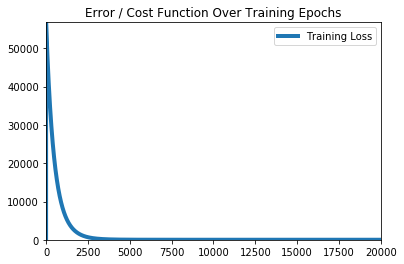

In [11]:
# Plot Cost Function over Training Epochs
fig, ax = plt.subplots()
line1, = plt.plot(range(len(cost_history)),cost_history, label="Training Loss", lw=4)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.title("Error / Cost Function Over Training Epochs")
plt.legend(handles=[line1], loc=1)
plt.show()


### Evaluating the Model Performance

Mean Squared Error over Training Data: 10.6385


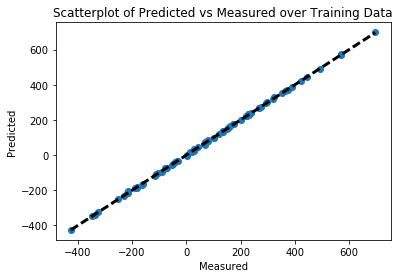

TensorFlow Linear Regression R-Squared Score on Training Data: 0.999791989942
Zero Intercept / Bias Value: 100.023
Number of Coefficients: 10


,Feature Name,Linear Coefficient
0,1,77.464828
1,2,33.892826
2,3,70.716393
3,4,1.381437
4,5,82.290848
5,6,97.061325
6,7,89.759911
7,8,60.946606
8,9,98.592728
9,10,3.591177


In [12]:
# Plot Prediction Over Training Data
pred_y_train = sess.run(y_, feed_dict={X: train_x})
mse_train = tf.reduce_mean(tf.square(pred_y_train - train_y))
print("Mean Squared Error over Training Data: %.4f" % sess.run(mse_train)) 

fig, ax = plt.subplots()
ax.scatter(train_y, pred_y_train)
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("Scatterplot of Predicted vs Measured over Training Data")
plt.show()

from sklearn.metrics import r2_score
print("TensorFlow Linear Regression R-Squared Score on Training Data:", r2_score(train_y, pred_y_train))
intercept_and_slope = sess.run(W)
intercept = intercept_and_slope[0][0]
slope = intercept_and_slope[1:].flatten()
print("Zero Intercept / Bias Value:", intercept)
print('Number of Coefficients:', len(slope))
pd.DataFrame(list(zip(features.columns, slope)), \
             columns = ['Feature Name', 'Linear Coefficient'])


Mean Squared Error over Testing Data: 17.3679


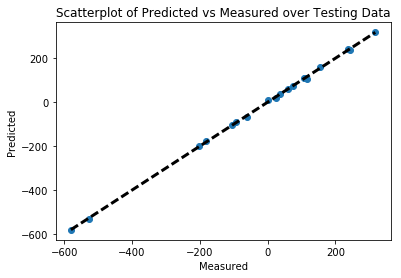

TensorFlow Linear Regression R-Squared Score on Training Data: 0.999656621733


In [13]:
# Plot Prediction Over Testing Data
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(test_y - pred_y))
print("Mean Squared Error over Testing Data: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("Scatterplot of Predicted vs Measured over Testing Data")
plt.show()

print("TensorFlow Linear Regression R-Squared Score on Training Data:", r2_score(test_y, pred_y))

# Close TensorFlow Session
sess.close()
